In [21]:
import QUANTAXIS as QA
import pandas as pd

# 这是一个单独股票上30分钟  KDJ金叉死叉的简单回测的例子



In [2]:
data=QA.QA_fetch_stock_min_adv('601318','2018-03-22','2018-08-23','30min')

In [3]:
res=data.add_func(QA.QA_indicator_KDJ)
sig=QA.CROSS(res.KDJ_J,res.KDJ_K)
sig2=QA.CROSS(res.KDJ_K,res.KDJ_J)


In [8]:
Account = QA.QA_Account(init_cash=100000,init_hold={},frequence=QA.FREQUENCE.THIRTY_MIN)
Broker = QA.QA_BacktestBroker()

Account.account_cookie = 'user_admin_macd'

In [10]:
_date = None
for items in data.panel_gen:
    if _date != items.date[0]:
        print('try to settle')
        _date=items.date[0]
        Account.settle()
    
    for item in items.security_gen:
        if sig[item.index].iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.datetime[0], 
                amount=1000, 
                towards=QA.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )
            Broker.receive_order(QA.QA_Event(order=order,market_data=item))
            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            print('buy')
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif sig2[item.index].iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order1=Account.send_order(
                    code=item.code[0], 
                    time=item.datetime[0],
                    amount=1000, 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.CLOSE, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                Broker.receive_order(QA.QA_Event(order=order1,market_data=item))
                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order1.account_cookie,order1.realorder_id]
                print('sell')
                order1.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)

try to settle
try to settle
try to settle
buy
receive deal
buy
receive deal
30182.550000000003
NOT ENOUGH MONEY FOR Order_jZCa52XO
try to settle
sell
receive deal
try to settle
try to settle
buy
receive deal
try to settle
sell
receive deal
try to settle
buy
receive deal
try to settle
buy
receive deal
31767.412500000006
NOT ENOUGH MONEY FOR Order_U2BwxIQY
sell
receive deal
buy
receive deal
try to settle
sell
receive deal
try to settle
buy
receive deal
try to settle
sell
receive deal
buy
receive deal
try to settle
sell
receive deal
try to settle
try to settle
buy
receive deal
try to settle
buy
receive deal
30130.595000000016
NOT ENOUGH MONEY FOR Order_yfuBSdaT
try to settle
sell
receive deal
try to settle
buy
receive deal
try to settle
sell
receive deal
try to settle
try to settle
buy
receive deal
buy
receive deal
29844.82750000003
NOT ENOUGH MONEY FOR Order_jn7ZRY26
try to settle
try to settle
sell
receive deal
try to settle
try to settle
buy
receive deal
buy
receive deal
34114.46750000

In [12]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax
0,2018-03-26 10:00:00,601318,69.80,1000,30182.5500,Order_X7b1I2Fh,Order_X7b1I2Fh,Trade_4IMgakHB,user_admin_macd,17.4500,0.000
1,2018-03-27 14:30:00,601318,67.76,-1000,97823.9700,Order_Q3aMUijc,Order_Q3aMUijc,Trade_AwVWihtq,user_admin_macd,16.9400,101.640
2,2018-03-29 11:00:00,601318,65.05,1000,32757.7075,Order_rDKR02VA,Order_rDKR02VA,Trade_3fmU8JRg,user_admin_macd,16.2625,0.000
3,2018-03-30 10:30:00,601318,65.04,-1000,97683.8875,Order_0VTCfplv,Order_0VTCfplv,Trade_GLi0fOTH,user_admin_macd,16.2600,97.560
4,2018-04-02 10:00:00,601318,65.90,1000,31767.4125,Order_BrEwu2GK,Order_BrEwu2GK,Trade_X0IbDLCR,user_admin_macd,16.4750,0.000
5,2018-04-03 14:00:00,601318,64.16,-1000,95815.1325,Order_l6RXOAhE,Order_l6RXOAhE,Trade_ECh14xAY,user_admin_macd,16.0400,96.240
6,2018-04-03 14:30:00,601318,64.81,1000,30988.9300,Order_ynOuHg7m,Order_ynOuHg7m,Trade_SOQnMJ1r,user_admin_macd,16.2025,0.000
7,2018-04-04 14:30:00,601318,64.74,-1000,95615.6350,Order_od2h8t7T,Order_od2h8t7T,Trade_dAgTp9Y7,user_admin_macd,16.1850,97.110
8,2018-04-09 11:00:00,601318,65.57,1000,30029.2425,Order_drne31Nc,Order_drne31Nc,Trade_iAzRuMEj,user_admin_macd,16.3925,0.000
9,2018-04-10 13:30:00,601318,66.64,-1000,96552.6225,Order_dHoiC6gT,Order_dHoiC6gT,Trade_BoN0Ecv1,user_admin_macd,16.6600,99.960


In [14]:
r=QA.QA_Risk(Account)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

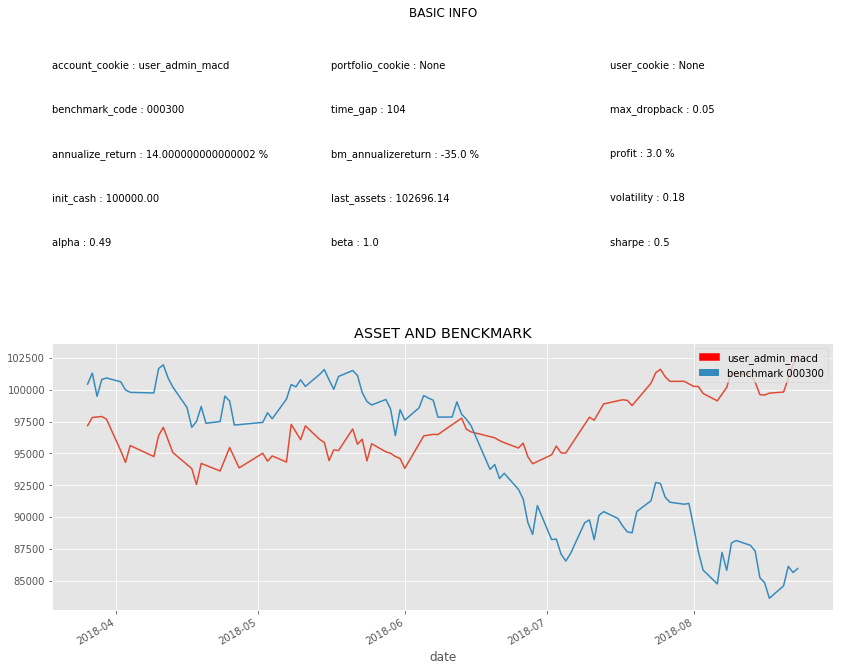

In [16]:
r.plot_assets_curve()

In [18]:
r.profit_construct

{'total_buyandsell': 8520.0,
 'total_tax': -4357.84,
 'total_commission': -1466.02,
 'total_profit': 2696.14}

In [19]:
p=QA.QA_Performance(Account)

In [20]:
p.pnl_fifo

,sell_date,buy_date,amount,sell_price,buy_price,pnl_ratio,pnl_money
code,,,,,,,
601318,2018-03-27 14:30:00,2018-03-26 10:00:00,1000,67.76,69.80,-0.029226,-2040.0
601318,2018-03-30 10:30:00,2018-03-29 11:00:00,1000,65.04,65.05,-0.000154,-10.0
601318,2018-04-03 14:00:00,2018-04-02 10:00:00,1000,64.16,65.90,-0.026404,-1740.0
601318,2018-04-04 14:30:00,2018-04-03 14:30:00,1000,64.74,64.81,-0.001080,-70.0
601318,2018-04-10 13:30:00,2018-04-09 11:00:00,1000,66.64,65.57,0.016318,1070.0
601318,2018-04-11 10:00:00,2018-04-10 14:00:00,1000,67.73,67.10,0.009389,630.0
601318,2018-04-17 13:30:00,2018-04-13 10:30:00,1000,63.79,66.90,-0.046487,-3110.0
601318,2018-04-19 14:30:00,2018-04-18 10:00:00,1000,64.09,63.56,0.008339,530.0
601318,2018-04-25 10:00:00,2018-04-23 10:00:00,1000,65.73,64.35,0.021445,1380.0
